In [1]:
%matplotlib inline

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

from hbam import complexity


In [2]:
results = list()

for i in np.arange(0, 1, 0.01):

    g = nx.erdos_renyi_graph(n=10, p=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])


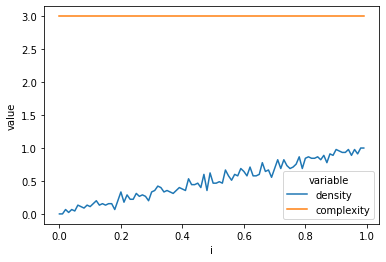

In [3]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()


In [4]:
results = list()

for i in np.arange(0, 1, 0.01):

    g = nx.watts_strogatz_graph(n=10, k=4, p=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])


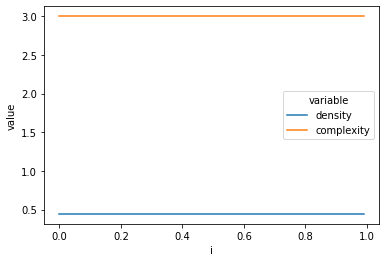

In [5]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()


In [6]:
results = list()

for i in np.arange(1, 10, 1):

    g = nx.barabasi_albert_graph(n=10, m=i)
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)
    results.append((i, nx.density(g), _complexity))

df = pd.DataFrame(results, columns=['i','density','complexity'])
df = df.melt(id_vars='i', value_vars=['density','complexity'])


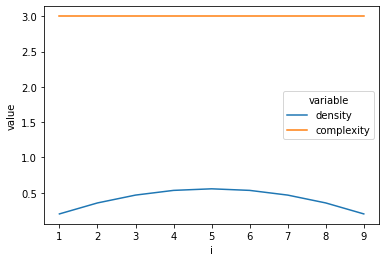

In [7]:
sns.lineplot(x=df.i, y=df.value, hue=df.variable)
plt.show()


In [20]:
from scipy.spatial.distance import cosine

g = nx.erdos_renyi_graph(n=100, p=0.02)
# g = nx.watts_strogatz_graph(n=100, k=4, p=0.01)
# g = nx.barabasi_albert_graph(n=100, m=i)
a = np.array(nx.adjacency_matrix(g).todense())
_complexity, _embedding = complexity(a, signature_size=8)

x = _embedding

DISTANCE = []

for i in tqdm(range(10)):
    node_a = np.random.choice(g.nodes)
    node_b = np.random.choice(g.nodes)
#     g.add_edge(node_a, node_b)
    g.remove_edges_from(sample(g.edges(), 1))
    a = np.array(nx.adjacency_matrix(g).todense())
    _complexity, _embedding = complexity(a, signature_size=8)

    y = _embedding

    DISTANCE.append((i, cosine(x,y)))
    


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-20-34042c318ae1>:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  g.remove_edges_from(sample(g.edges(), 1))


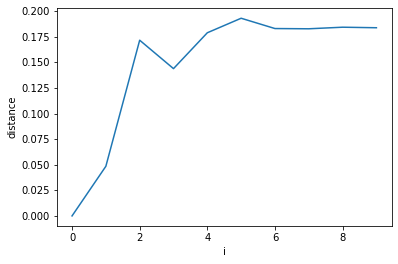

In [21]:
df = pd.DataFrame(DISTANCE, columns=['i','distance'])

sns.lineplot(x=df.i, y=df.distance)
plt.show()


In [17]:
from random import sample

sample(g.edges(), 1)

<ipython-input-17-d6750886df31>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample(g.edges(), 1)


[(14, 81)]